# <center> Converting .txt files into .pkl files <center>

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import mplhep as hep
from scipy.optimize import curve_fit
import pandas as pd
import hist
from hist import Hist

plt.style.use(hep.style.ROOT)

### User Defined

In [10]:
with open('Run30_list.txt') as f:
    lines = f.read().split('\n')
tags = None
channels =[]
timeStamps = []
din={}
for line in lines:
    if line[:2]=="//" or len(line)==0:
        continue
    #first line after comments
    if tags is None:
        tags = line.split()
        tags=tags[-5:-2]
        continue;
    split = line.split()
    if(len(split) == 8):
        timeStamps.append(float(split[0]))
    channel, LG, HG = split[-5:-2]
    if channel not in channels:
        din[f"Ch_{channel}_LG"] = []
        din[f"Ch_{channel}_HG"] = []
        channels.append(channel)
    din[f"Ch_{channel}_LG"].append(float(LG))
    din[f"Ch_{channel}_HG"].append(float(HG))

din[f"TimeStamps"] = []
din[f"TimeStamps"] = timeStamps

#This says ptrig, but could be used for either ptrig or cosmic data. Just label which is which
ptrigDF = pd.DataFrame(din)
print(f"Done! Total events: {len(ptrigDF)}")
#ptrigDF.to_pickle("./COSMIC_LG50_HG50_4k_R26.pkl") 


Done! Total events: 8659


In [11]:
print(ptrigDF)
ptrigDF.to_pickle('./COSMIC_LG30_HG50_4k_R30.pkl')

      Ch_00_LG  Ch_00_HG  Ch_01_LG  Ch_01_HG  Ch_02_LG  Ch_02_HG  Ch_03_LG  \
0         79.0      68.0      60.0      70.0      65.0      67.0      67.0   
1         87.0      67.0     178.0     581.0      69.0      64.0      67.0   
2         75.0      96.0      64.0      84.0      72.0      82.0      78.0   
3         71.0      74.0      72.0      70.0      57.0      63.0      73.0   
4        133.0     336.0      85.0      64.0      64.0      60.0      64.0   
...        ...       ...       ...       ...       ...       ...       ...   
8654      57.0      76.0      63.0      58.0      56.0      47.0      53.0   
8655      64.0      72.0      49.0      52.0      52.0      56.0      60.0   
8656      58.0      57.0      58.0      50.0     134.0     404.0      61.0   
8657      66.0      43.0     116.0     381.0      56.0      55.0      57.0   
8658      58.0      70.0      55.0      69.0      56.0      66.0      59.0   

      Ch_03_HG  Ch_04_LG  Ch_04_HG  ...  Ch_22_HG  Ch_23_LG  Ch

Plotting raw data for inspection

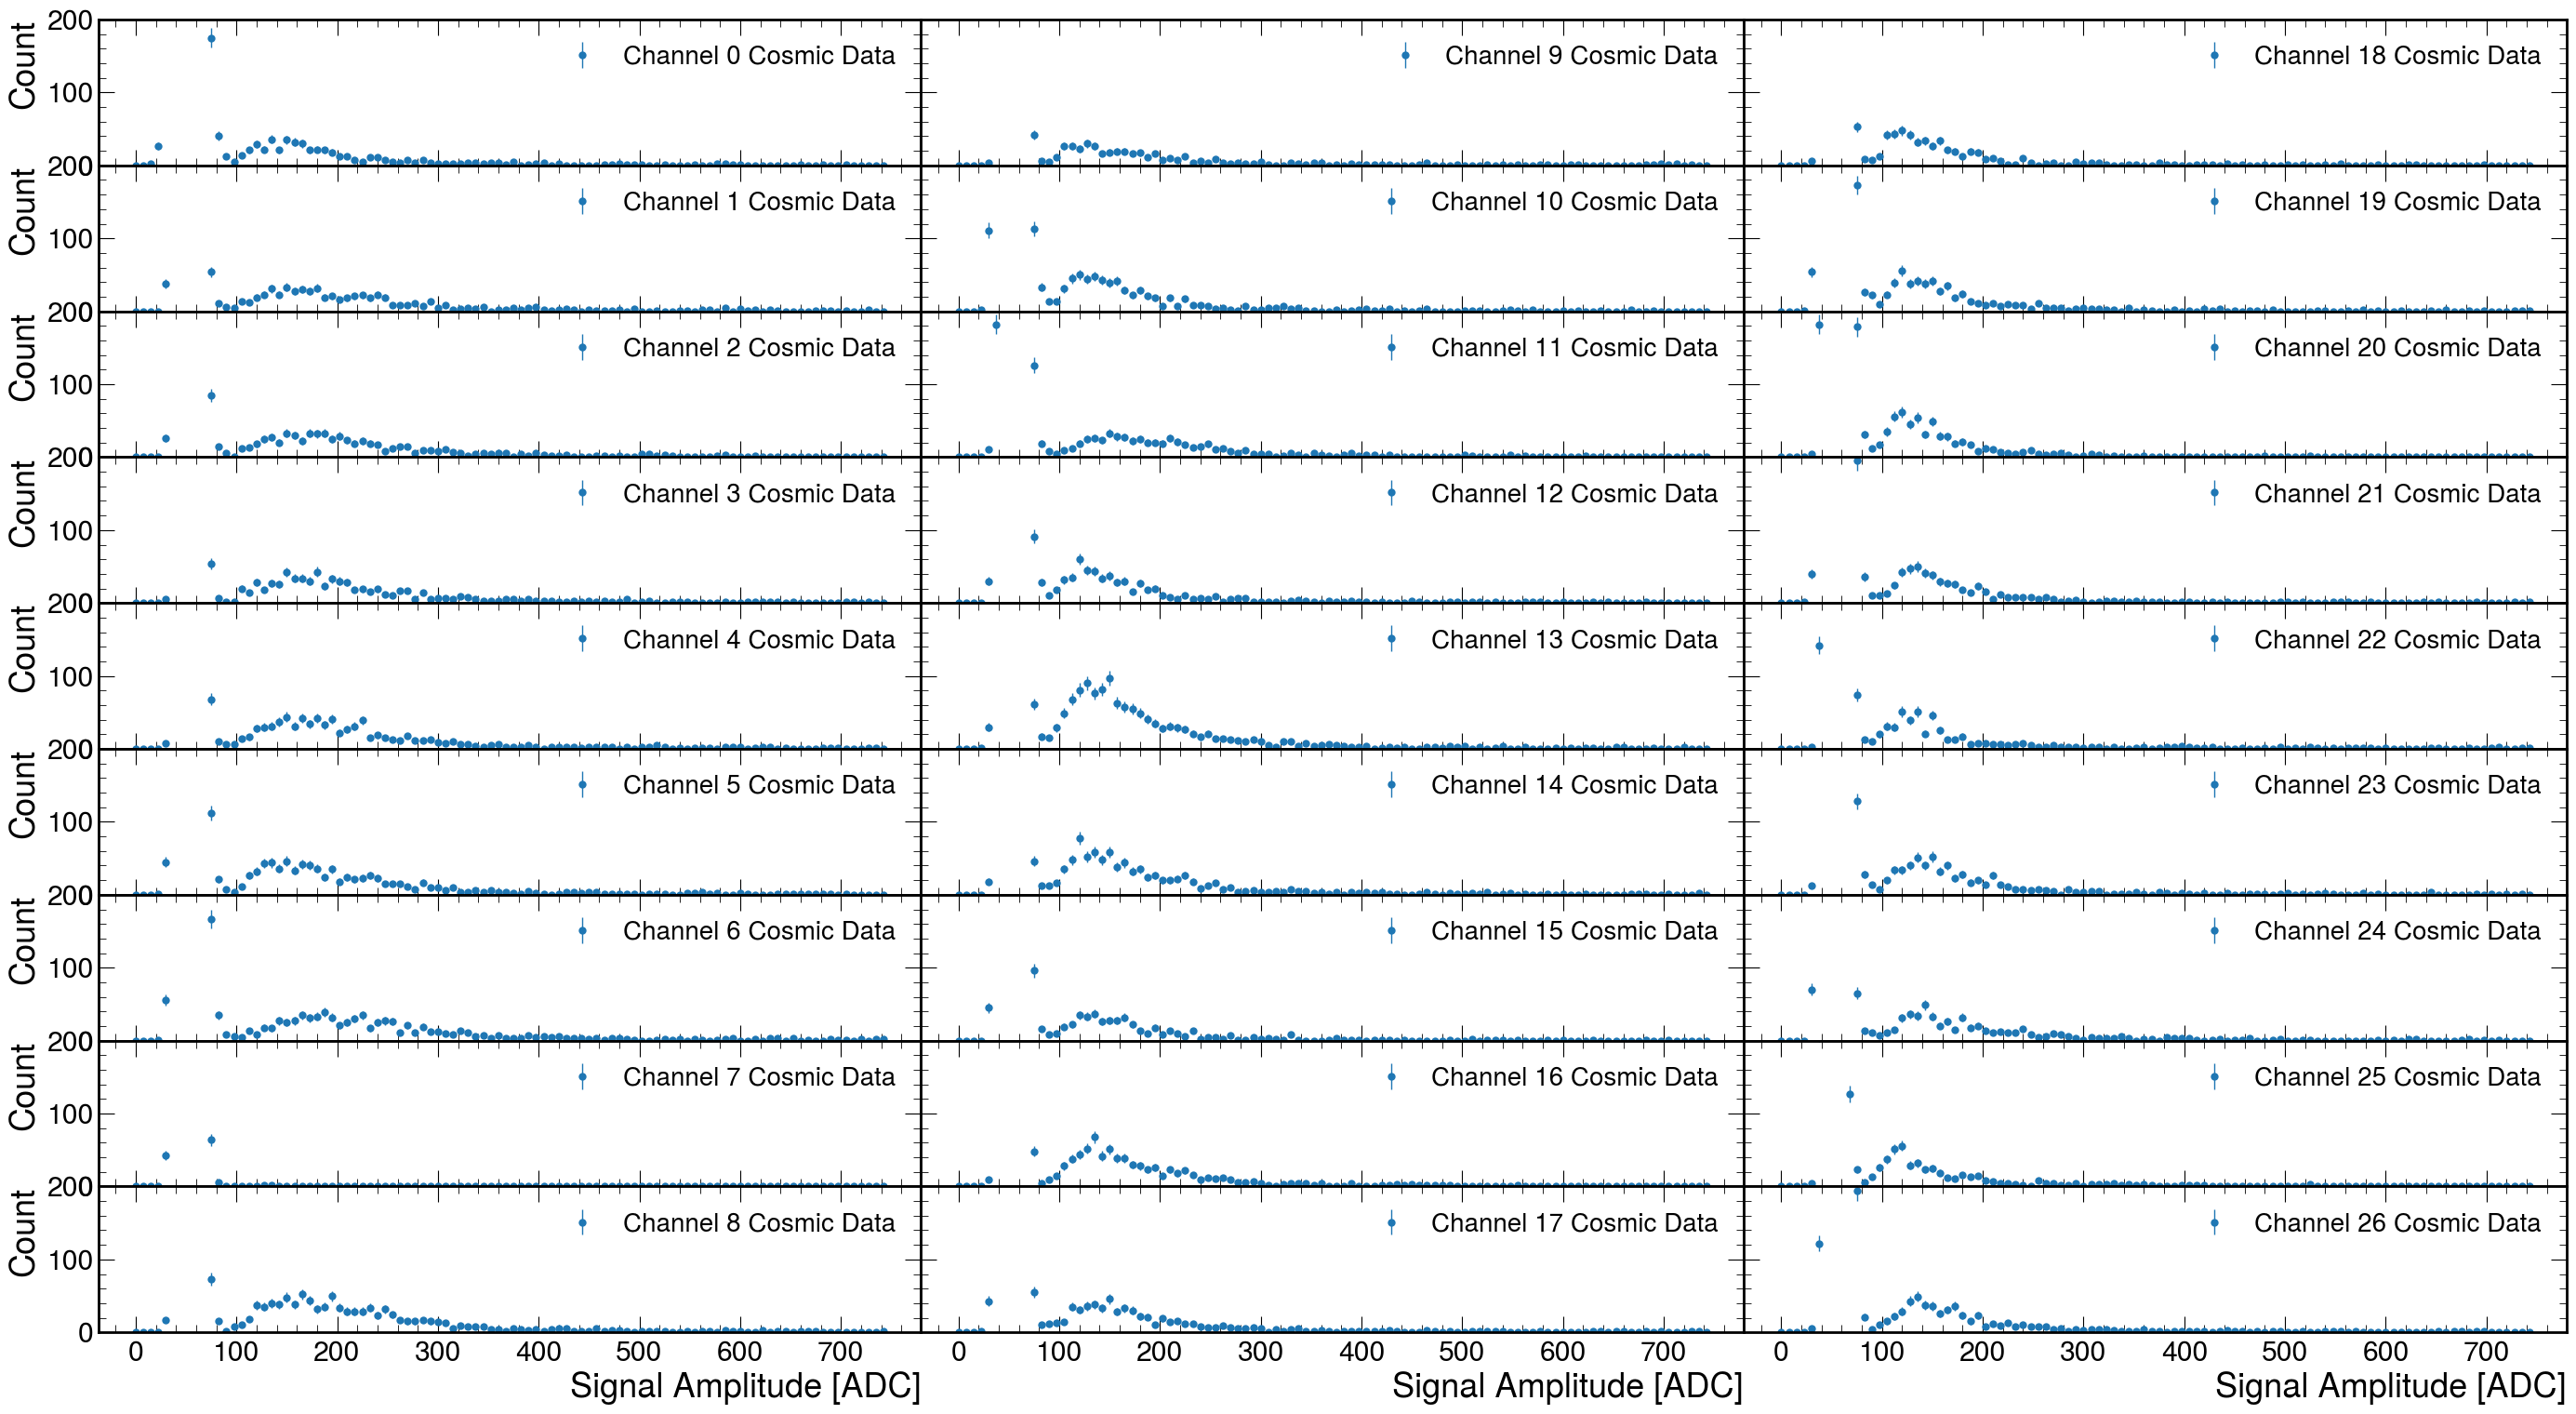

In [16]:
#plot random trigger spectra for each low gain channel. Fit to gaussian and record pedestals for cuts later

fig, axs=plt.subplots(9, 3, figsize=(0.5*len(ptrigDF.columns),15),sharey=True,sharex=True)
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

mips = []
mipStds = []

for i in range(27):
    plt.sca(axs[i%9][i//9])

    h = hist.Hist(hist.axis.Regular(100, 0, 750, name="Ptrig"))
    
    cosmicCh = np.array(getattr(ptrigDF,"Ch_{}_LG".format("{:02d}".format(i))))
  
    h.fill(cosmicCh)
    #h.plot(color='tab:blue',label=f"Channel {i} Cosmic Data")  
    
    data = h.values()[()]
    bins = h.axes[0].edges[:-1]
    
    plt.errorbar(bins,data,yerr=np.sqrt(data),fmt='o',ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0,label=f"Channel {i} Cosmic Data")

    
    # Find the bin number with the maximum value
    max_bin_number = np.argmax(h.values())

    # Get the axis from the histogram
    axis = h.axes[0]

    # Find the x-coordinate corresponding to the maximum bin
    x_coordinate = axis.edges[max_bin_number]
    #mips.append(x_coordinate)
    
    
    plt.legend(loc='upper right', fontsize=20)    
    
    # Set the title and axis labels for the subplot   
    if (i+1)%9 == 0:
        plt.xlabel('Signal Amplitude [ADC]')
    if i <= 8:
        plt.ylabel('Count')
    

# Adjust the spacing between subplots
plt.ylim(0,200)
plt.tight_layout(pad=0.0)
plt.subplots_adjust(hspace=0.0, wspace=0.0)